In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
data_train = pd.read_csv('/kaggle/input/cache123/data_train.csv')

In [6]:
data_train


,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five,u_num_of_orders,u_avg_prd,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,average_days_between_orders,u_total_items_bought,p_num_of_times,p_reorder_ratio,p_avg_cart_position,reordered,aisle_id,department_id
0,10,1.000000,5.0,1.0,10,5.900000,4,7,0.695,21.084746,59,35791,0.776480,3.721774,1.0,0.129186,0.126562
1,9,1.000000,5.0,1.0,10,5.900000,4,7,0.695,21.084746,59,1946,0.713772,4.277492,1.0,0.070016,0.088504
2,1,0.166667,0.0,0.0,10,5.900000,4,7,0.695,21.084746,59,5526,0.652009,4.191097,0.0,0.169402,0.128506
3,10,1.000000,5.0,1.0,10,5.900000,4,7,0.695,21.084746,59,6476,0.740735,4.760037,0.0,0.097201,0.088504
4,3,0.333333,2.0,0.4,10,5.900000,4,7,0.695,21.084746,59,3751,0.657158,5.622767,1.0,0.092412,0.085004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8474656,3,0.300000,1.0,0.2,13,9.923077,1,12,0.473,21.255814,129,55371,0.630583,9.194723,0.0,0.126818,0.128506
8474657,1,0.142857,0.0,0.0,13,9.923077,1,12,0.473,21.255814,129,3485,0.401148,10.109900,0.0,0.058856,0.063458
8474658,1,0.333333,1.0,0.2,13,9.923077,1,12,0.473,21.255814,129,3934,0.699288,8.344942,0.0,0.095193,0.054678
8474659,1,0.142857,0.0,0.0,13,9.923077,1,12,0.473,21.255814,129,9783,0.357661,8.763058,0.0,0.038712,0.037791


In [8]:
data_train['p_num_of_times'].nunique()

4161

In [10]:
data_train = data_train.rename(columns={'average_days_between_orders':'avg_days_bet_o'})

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

[Text(0.5, 0, 'uxp_times_bought'),
 Text(1.5, 0, 'uxp_reorder_ratio'),
 Text(2.5, 0, 'uxp_last_five'),
 Text(3.5, 0, 'uxp_ratio_last_five'),
 Text(4.5, 0, 'u_num_of_orders'),
 Text(5.5, 0, 'u_avg_prd'),
 Text(6.5, 0, 'dow_u_most_orders'),
 Text(7.5, 0, 'hod_u_most_orders'),
 Text(8.5, 0, 'u_reorder_ratio'),
 Text(9.5, 0, 'avg_days_bet_o'),
 Text(10.5, 0, 'u_total_items_bought'),
 Text(11.5, 0, 'p_num_of_times'),
 Text(12.5, 0, 'p_reorder_ratio'),
 Text(13.5, 0, 'p_avg_cart_position'),
 Text(14.5, 0, 'reordered'),
 Text(15.5, 0, 'aisle_id'),
 Text(16.5, 0, 'department_id')]

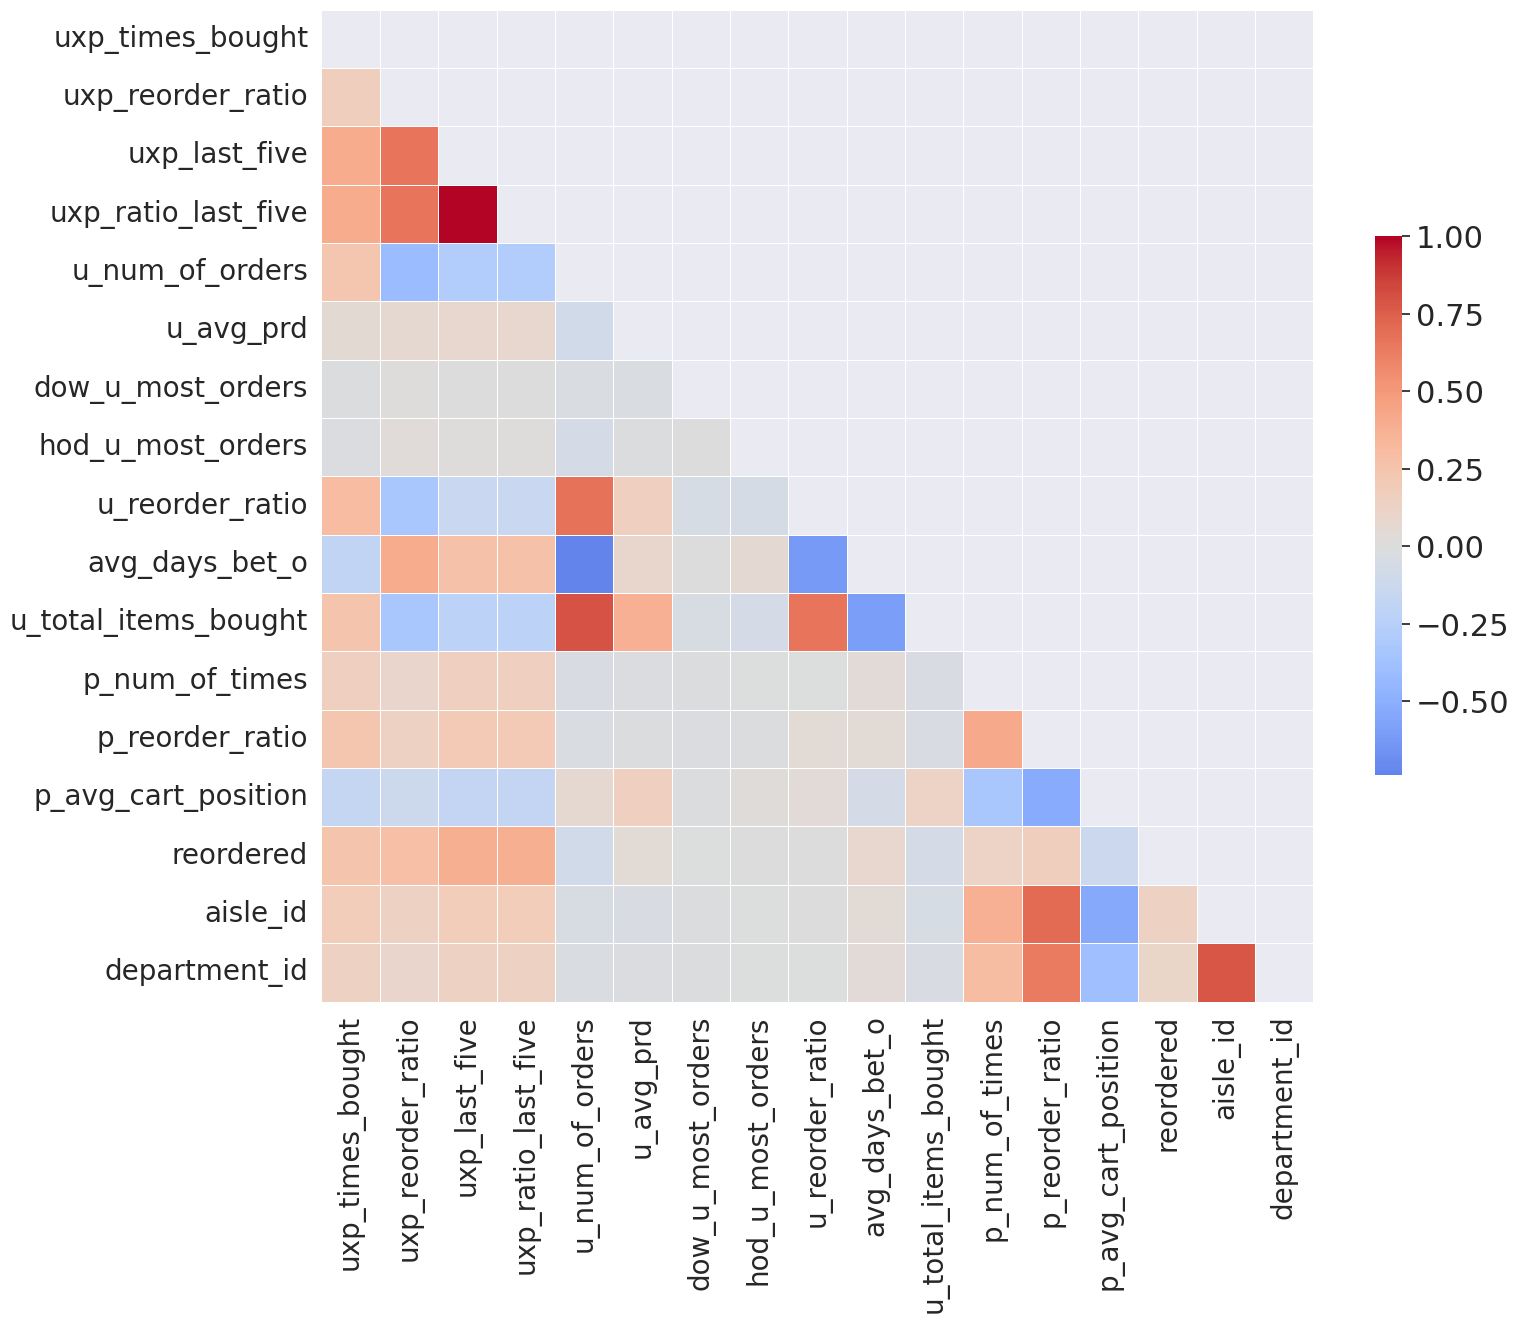

In [29]:
# Compute the correlation matrix
corr = data_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 14))

# Generate a custom diverging colormap
cmap = 'coolwarm'


# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(
    corr, mask=mask,
    cmap=cmap,
    square=True,
    linewidths=.5,
    center=0,
    cbar_kws={"shrink": .5},
)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)

In [13]:
def plot_feature_importance(importance, names, model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(30, 20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE', size = 50)
    plt.xlabel('FEATURE IMPORTANCE', size = 50)
    plt.ylabel('FEATURE NAMES', size = 50)
    plt.yticks(size = 40)
    plt.xticks(size = 40)
    
    plt.show()

In [14]:
from sklearn.feature_selection import chi2

X = data_train.drop(['reordered', 'uxp_ratio_last_five'], axis=1)
y = data_train.reordered


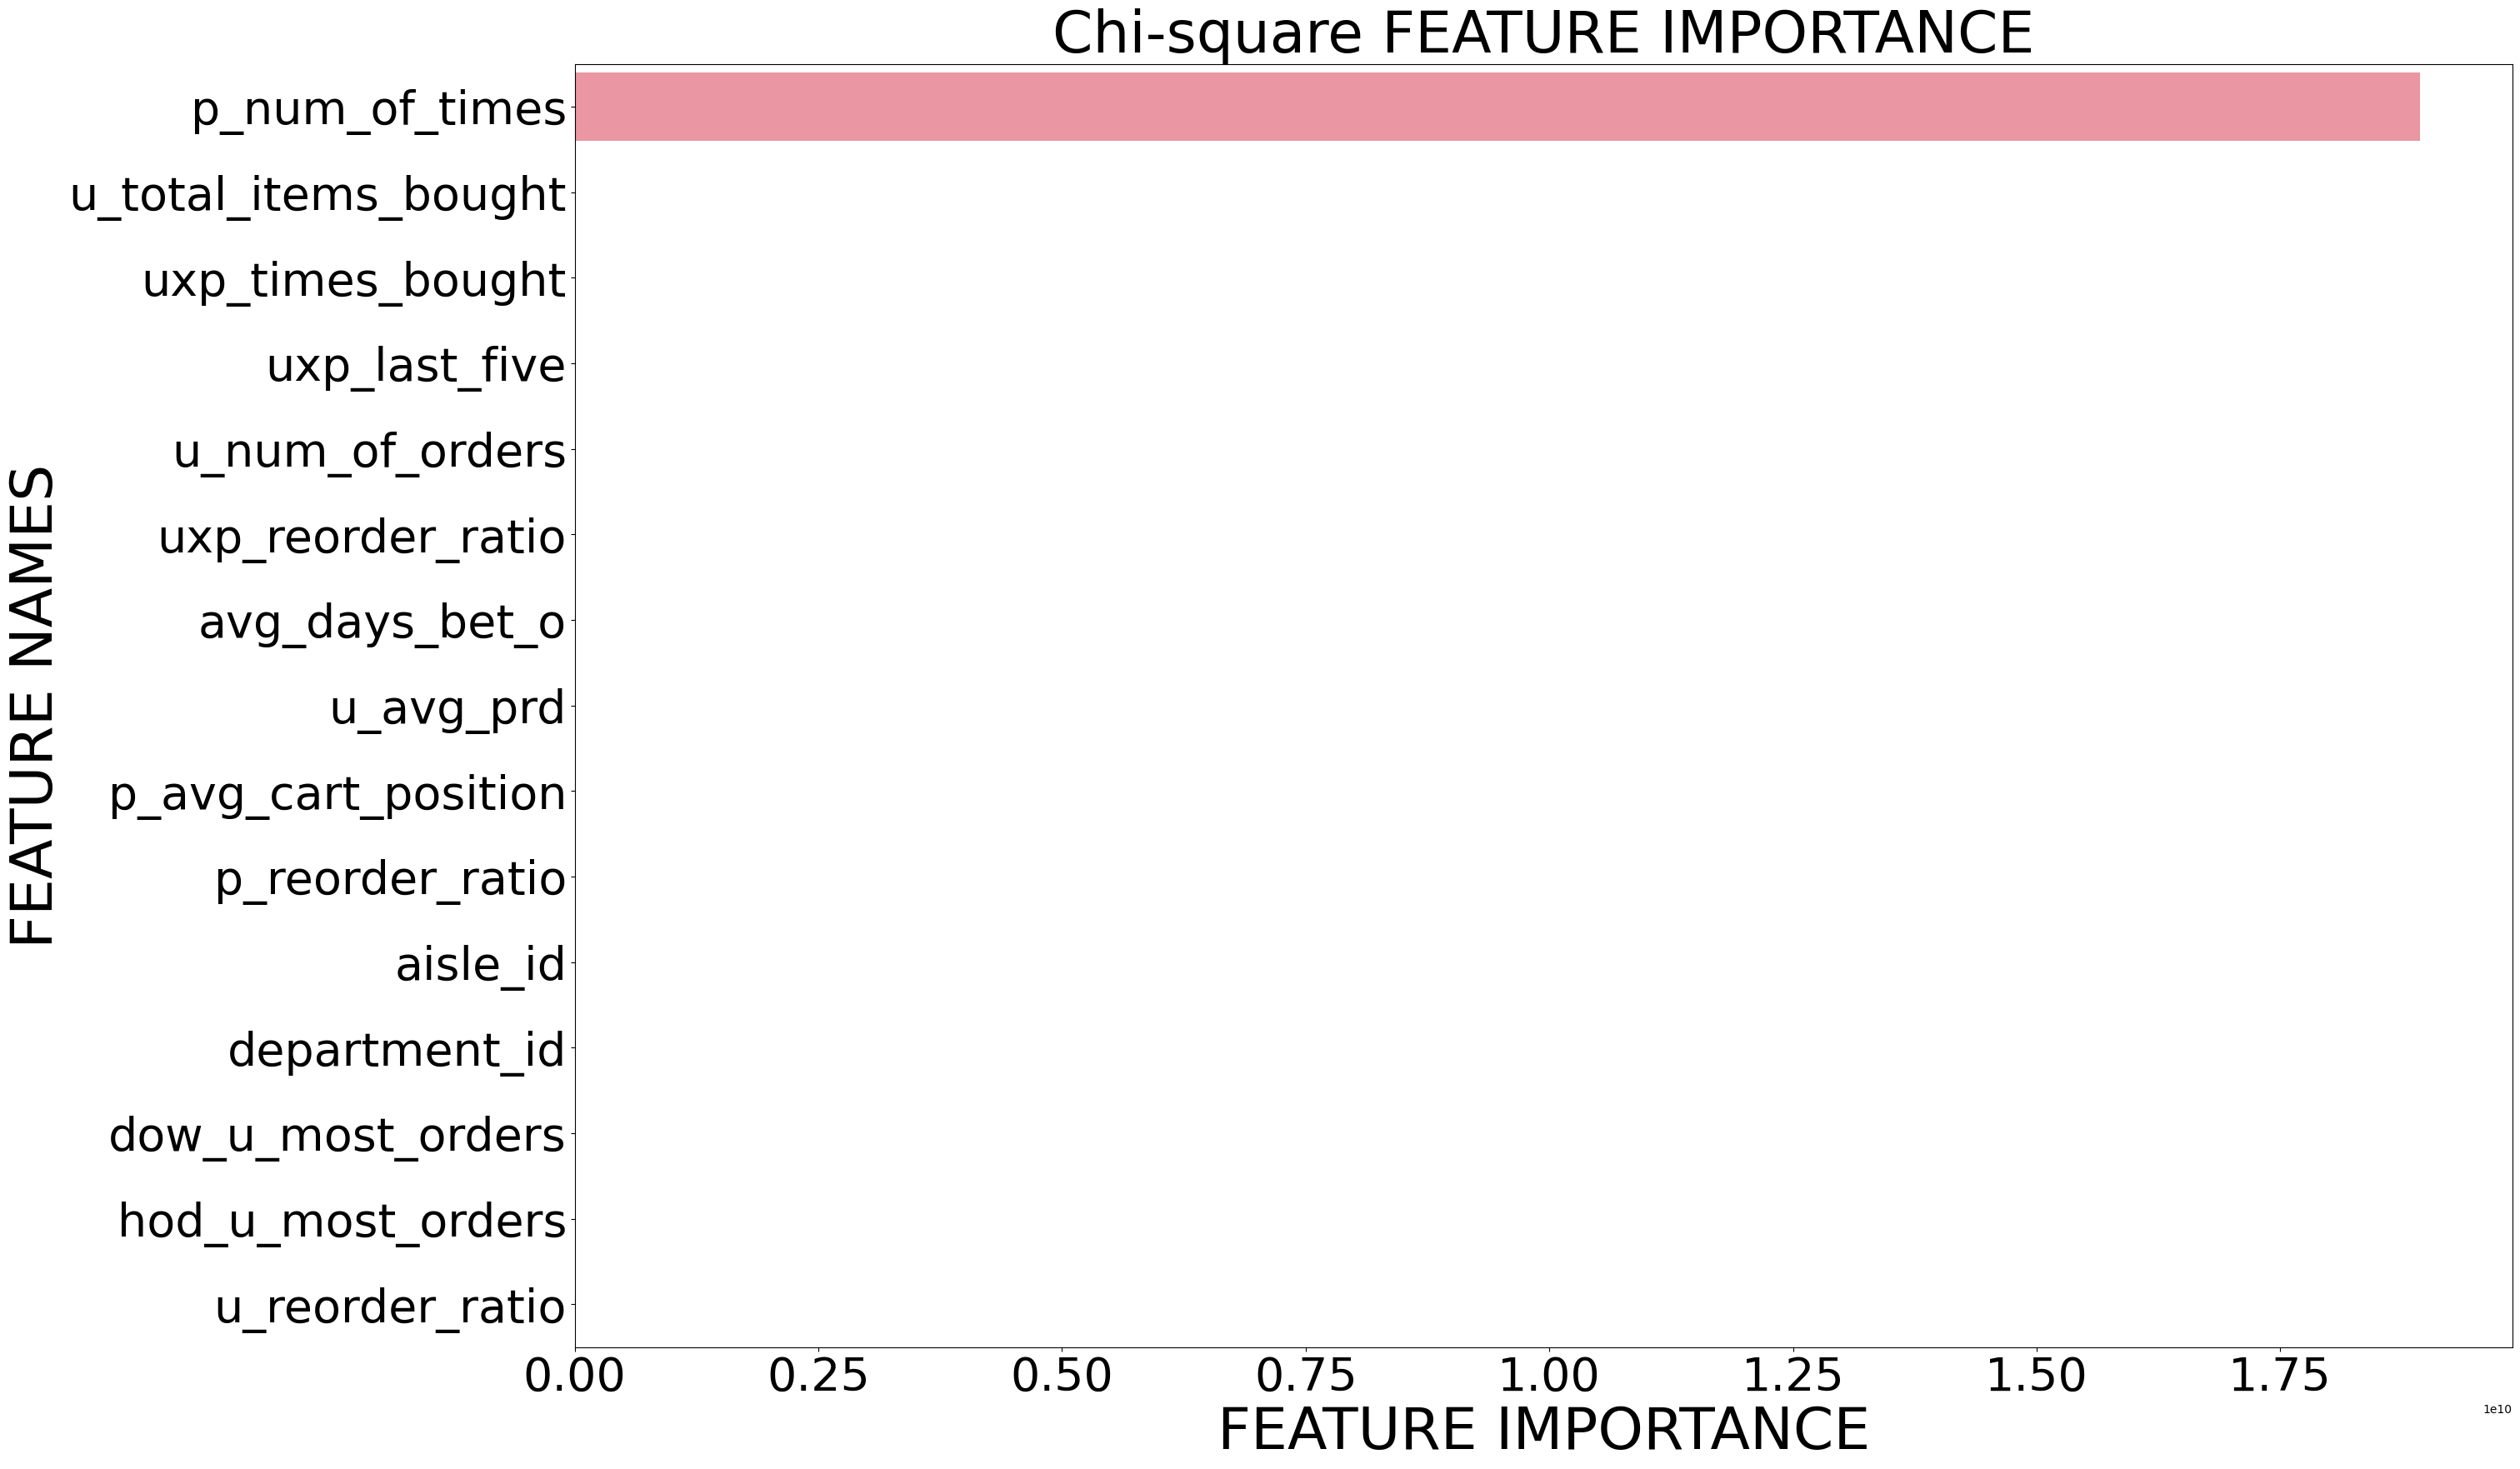

In [15]:
chi2_scores, _ = chi2(np.abs(X.values), y)

chi2_feats_score = list(zip(X.columns, chi2_scores))
chi2_feats_score.sort(key=lambda x: -x[1])

plot_feature_importance(
    [i[1] for i in chi2_feats_score],
    [i[0] for i in chi2_feats_score],
    'Chi-square'
)

In [16]:
from sklearn.feature_selection import f_classif

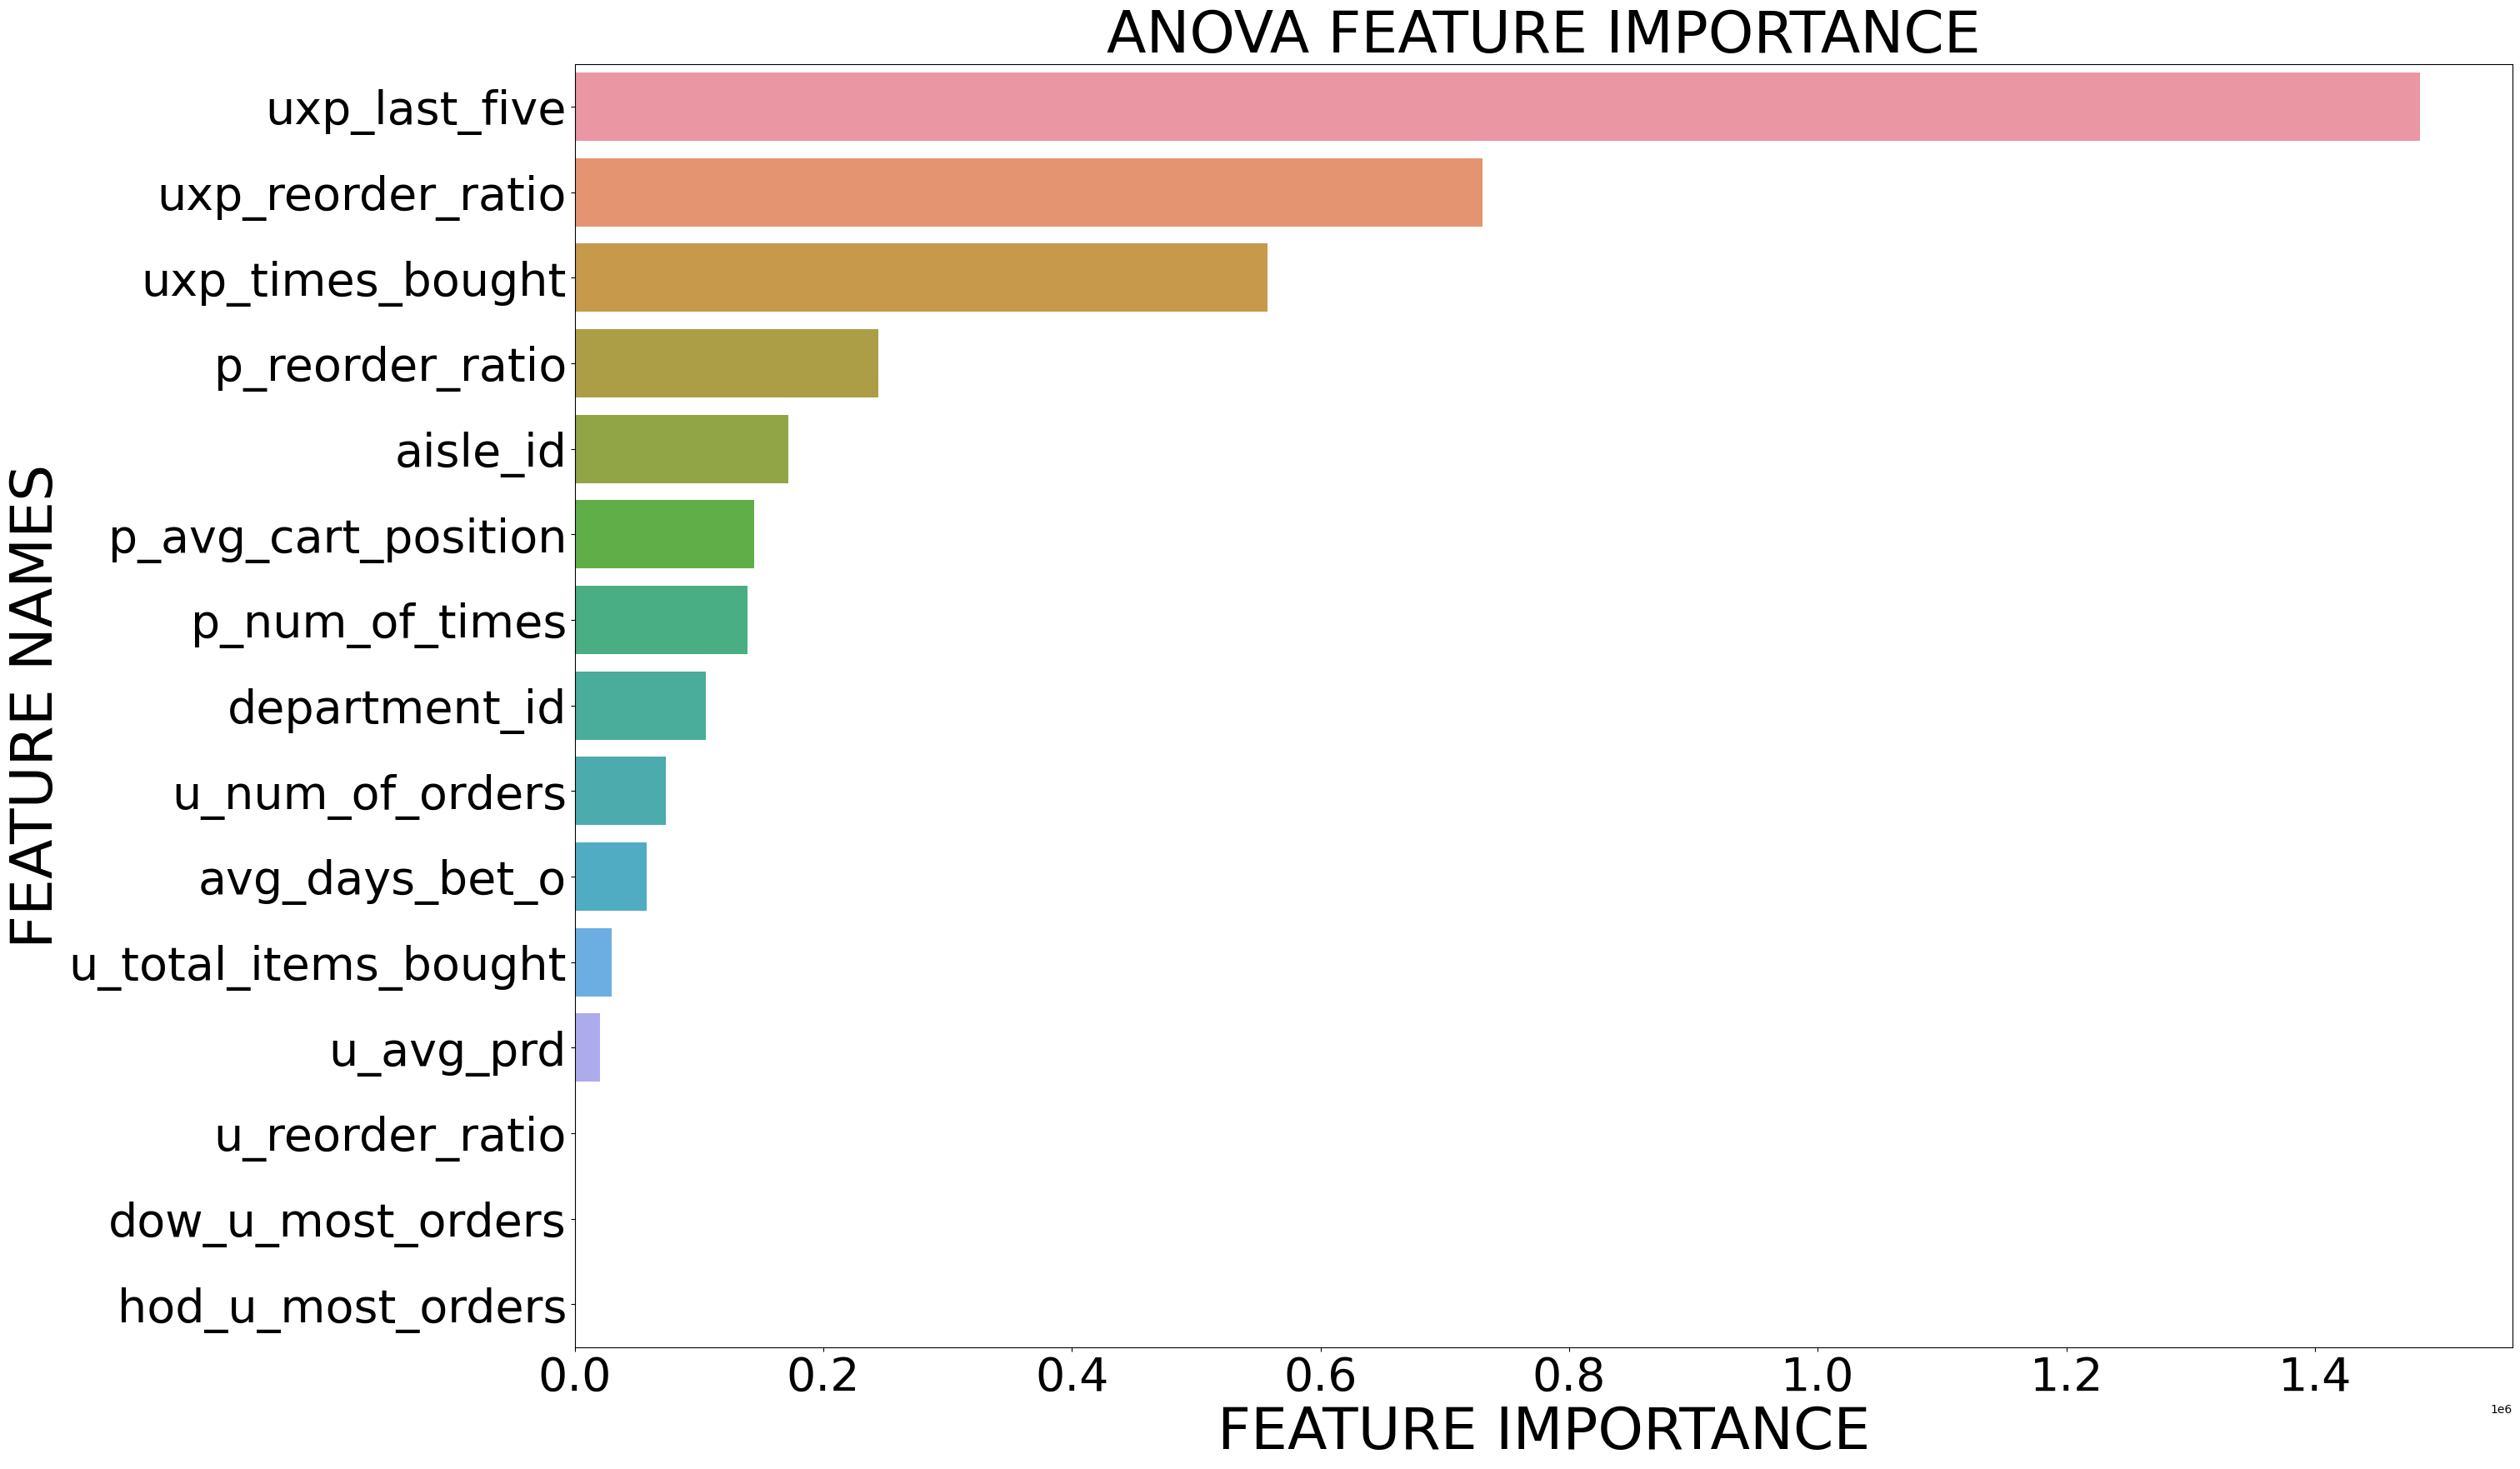

In [17]:

# ANOVA với toàn bộ dữ liệu
anova_scores, _ = f_classif(X, y)

anova_feats_score = list(zip(X.columns, anova_scores))
anova_feats_score.sort(key=lambda x: -x[1])

plot_feature_importance(
    [i[1] for i in anova_feats_score][:50],
    [i[0] for i in anova_feats_score][:50],
    'ANOVA'
)

In [18]:
from sklearn.feature_selection import f_regression

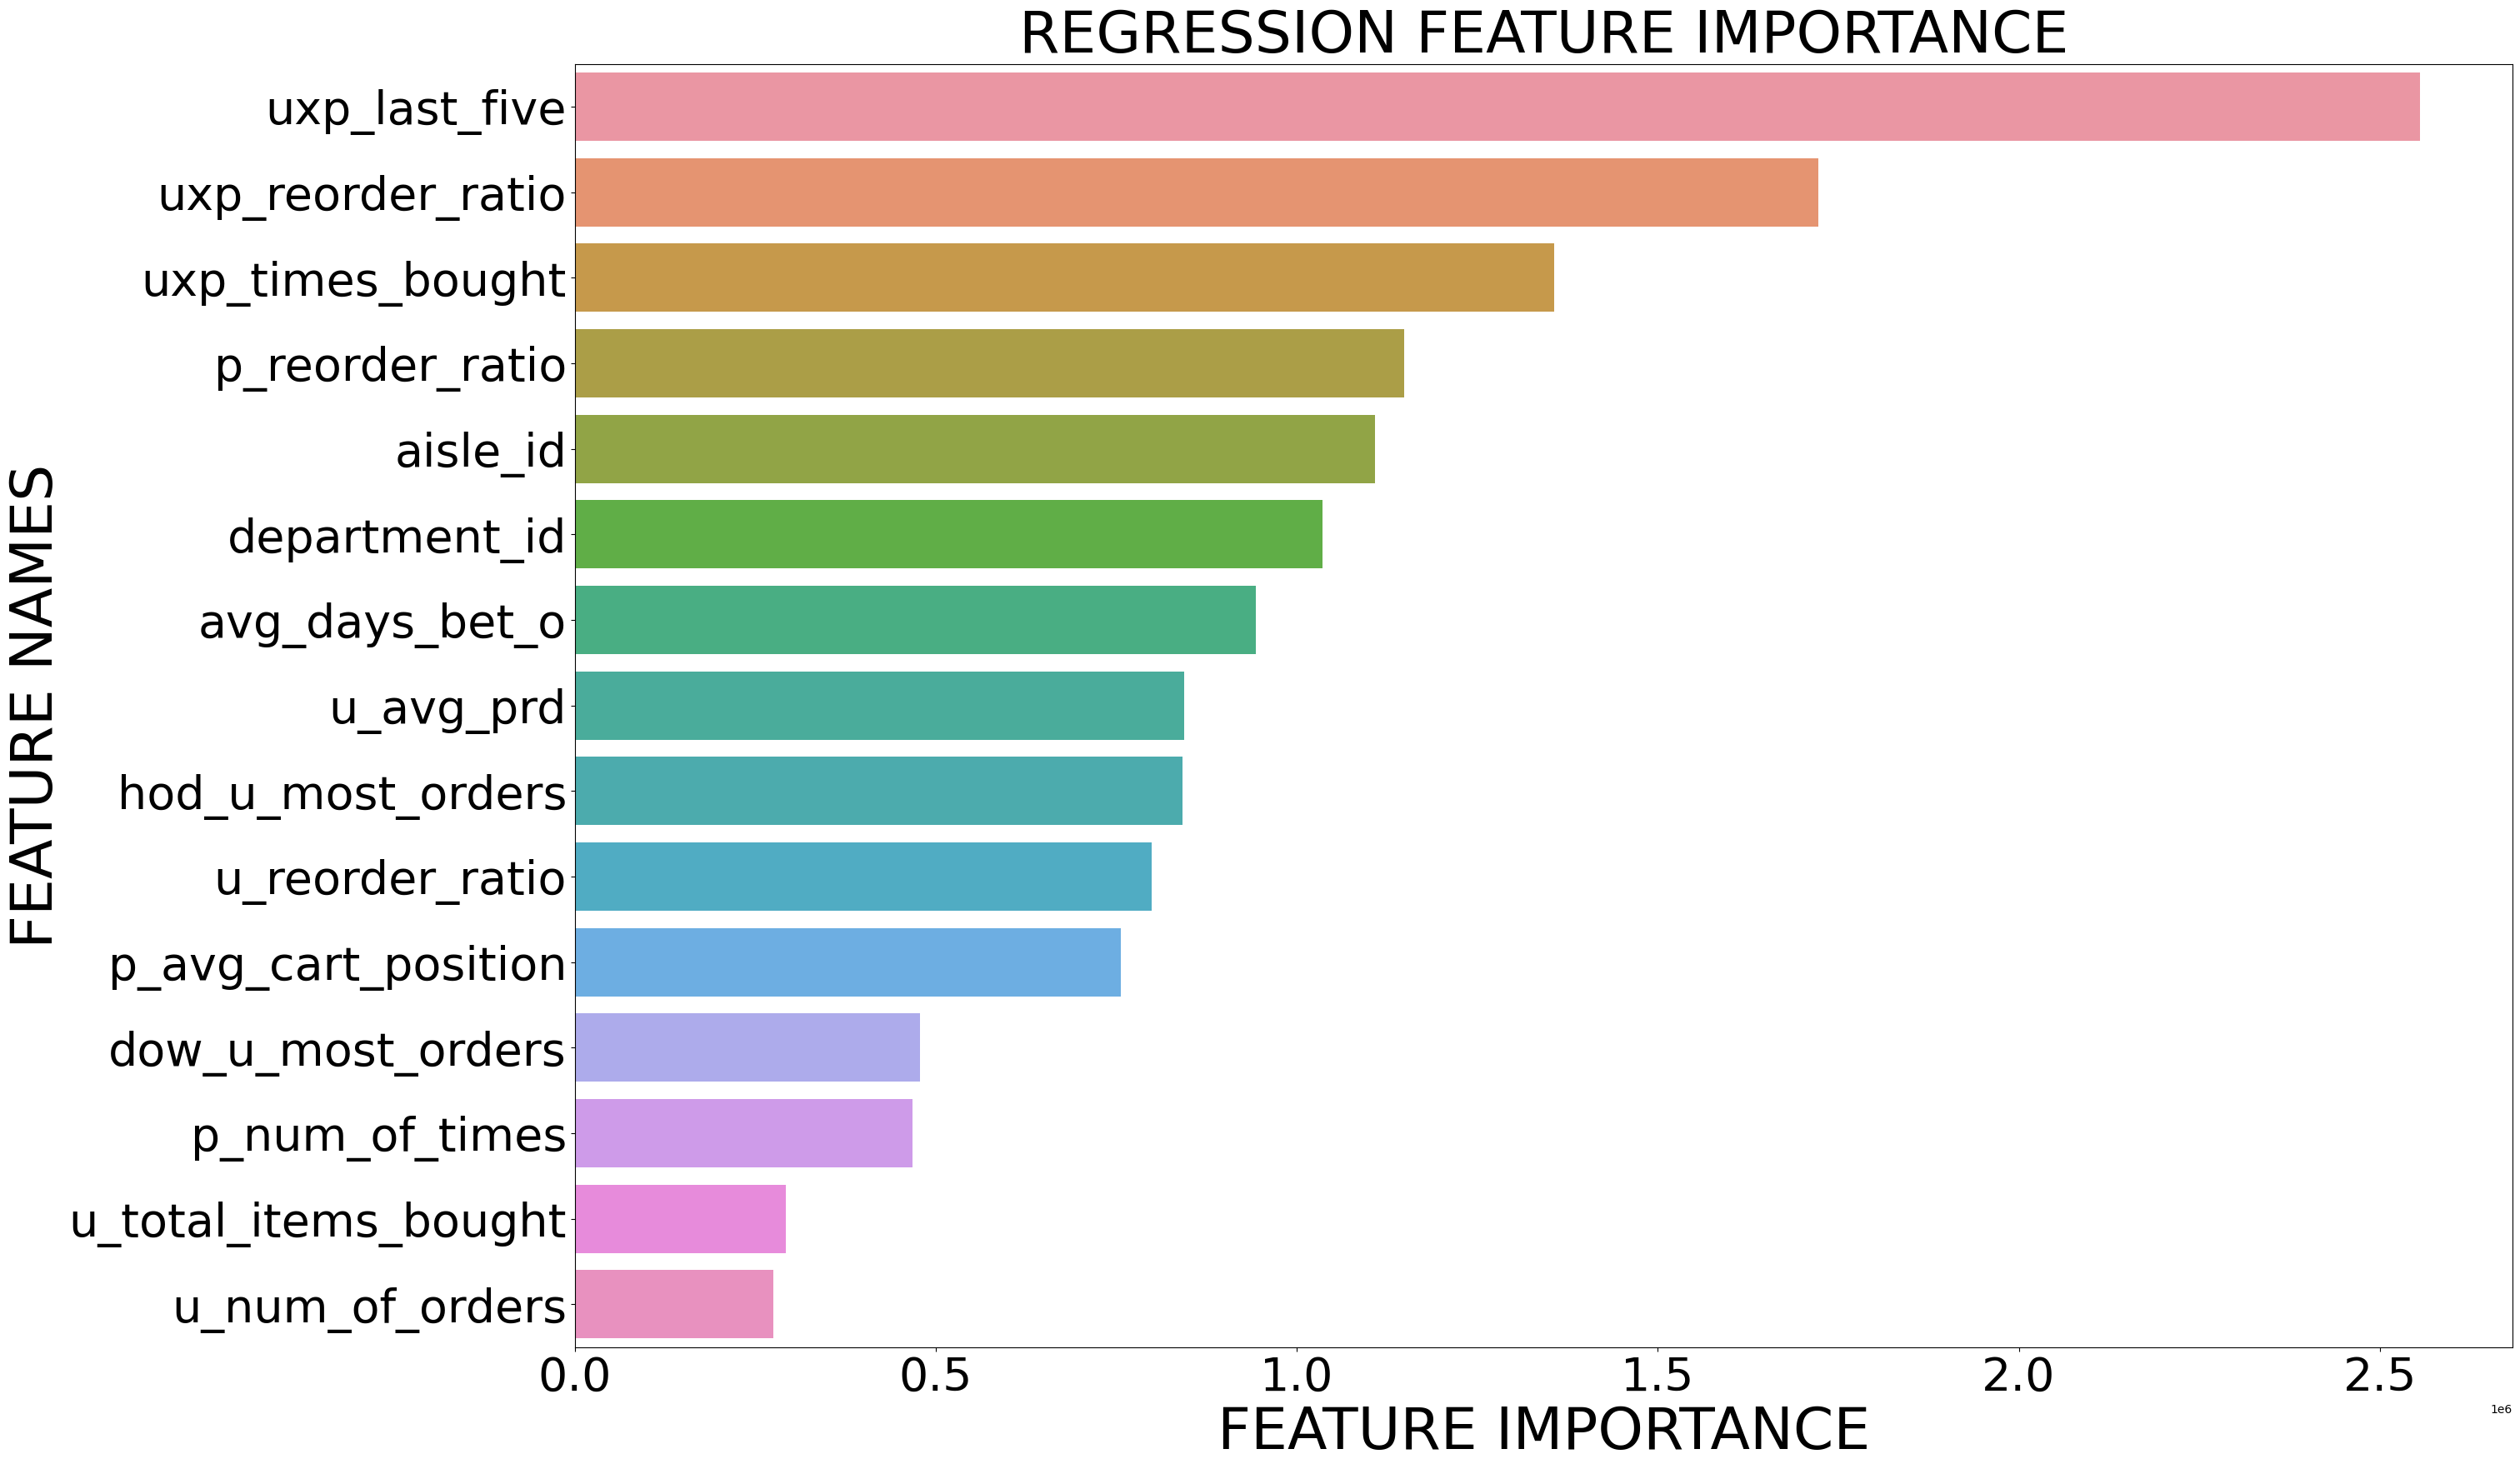

In [19]:
# REGRESSION với toàn bộ dữ liệu
regr_scores, _ = f_regression(X, y, center=False)

regr_feats_score = list(zip(X.columns, regr_scores))
regr_feats_score.sort(key=lambda x: -x[1])

plot_feature_importance(
    [i[1] for i in regr_feats_score][:50],
    [i[0] for i in regr_feats_score][:50],
    'REGRESSION'
)

In [20]:
import lightgbm as lgb

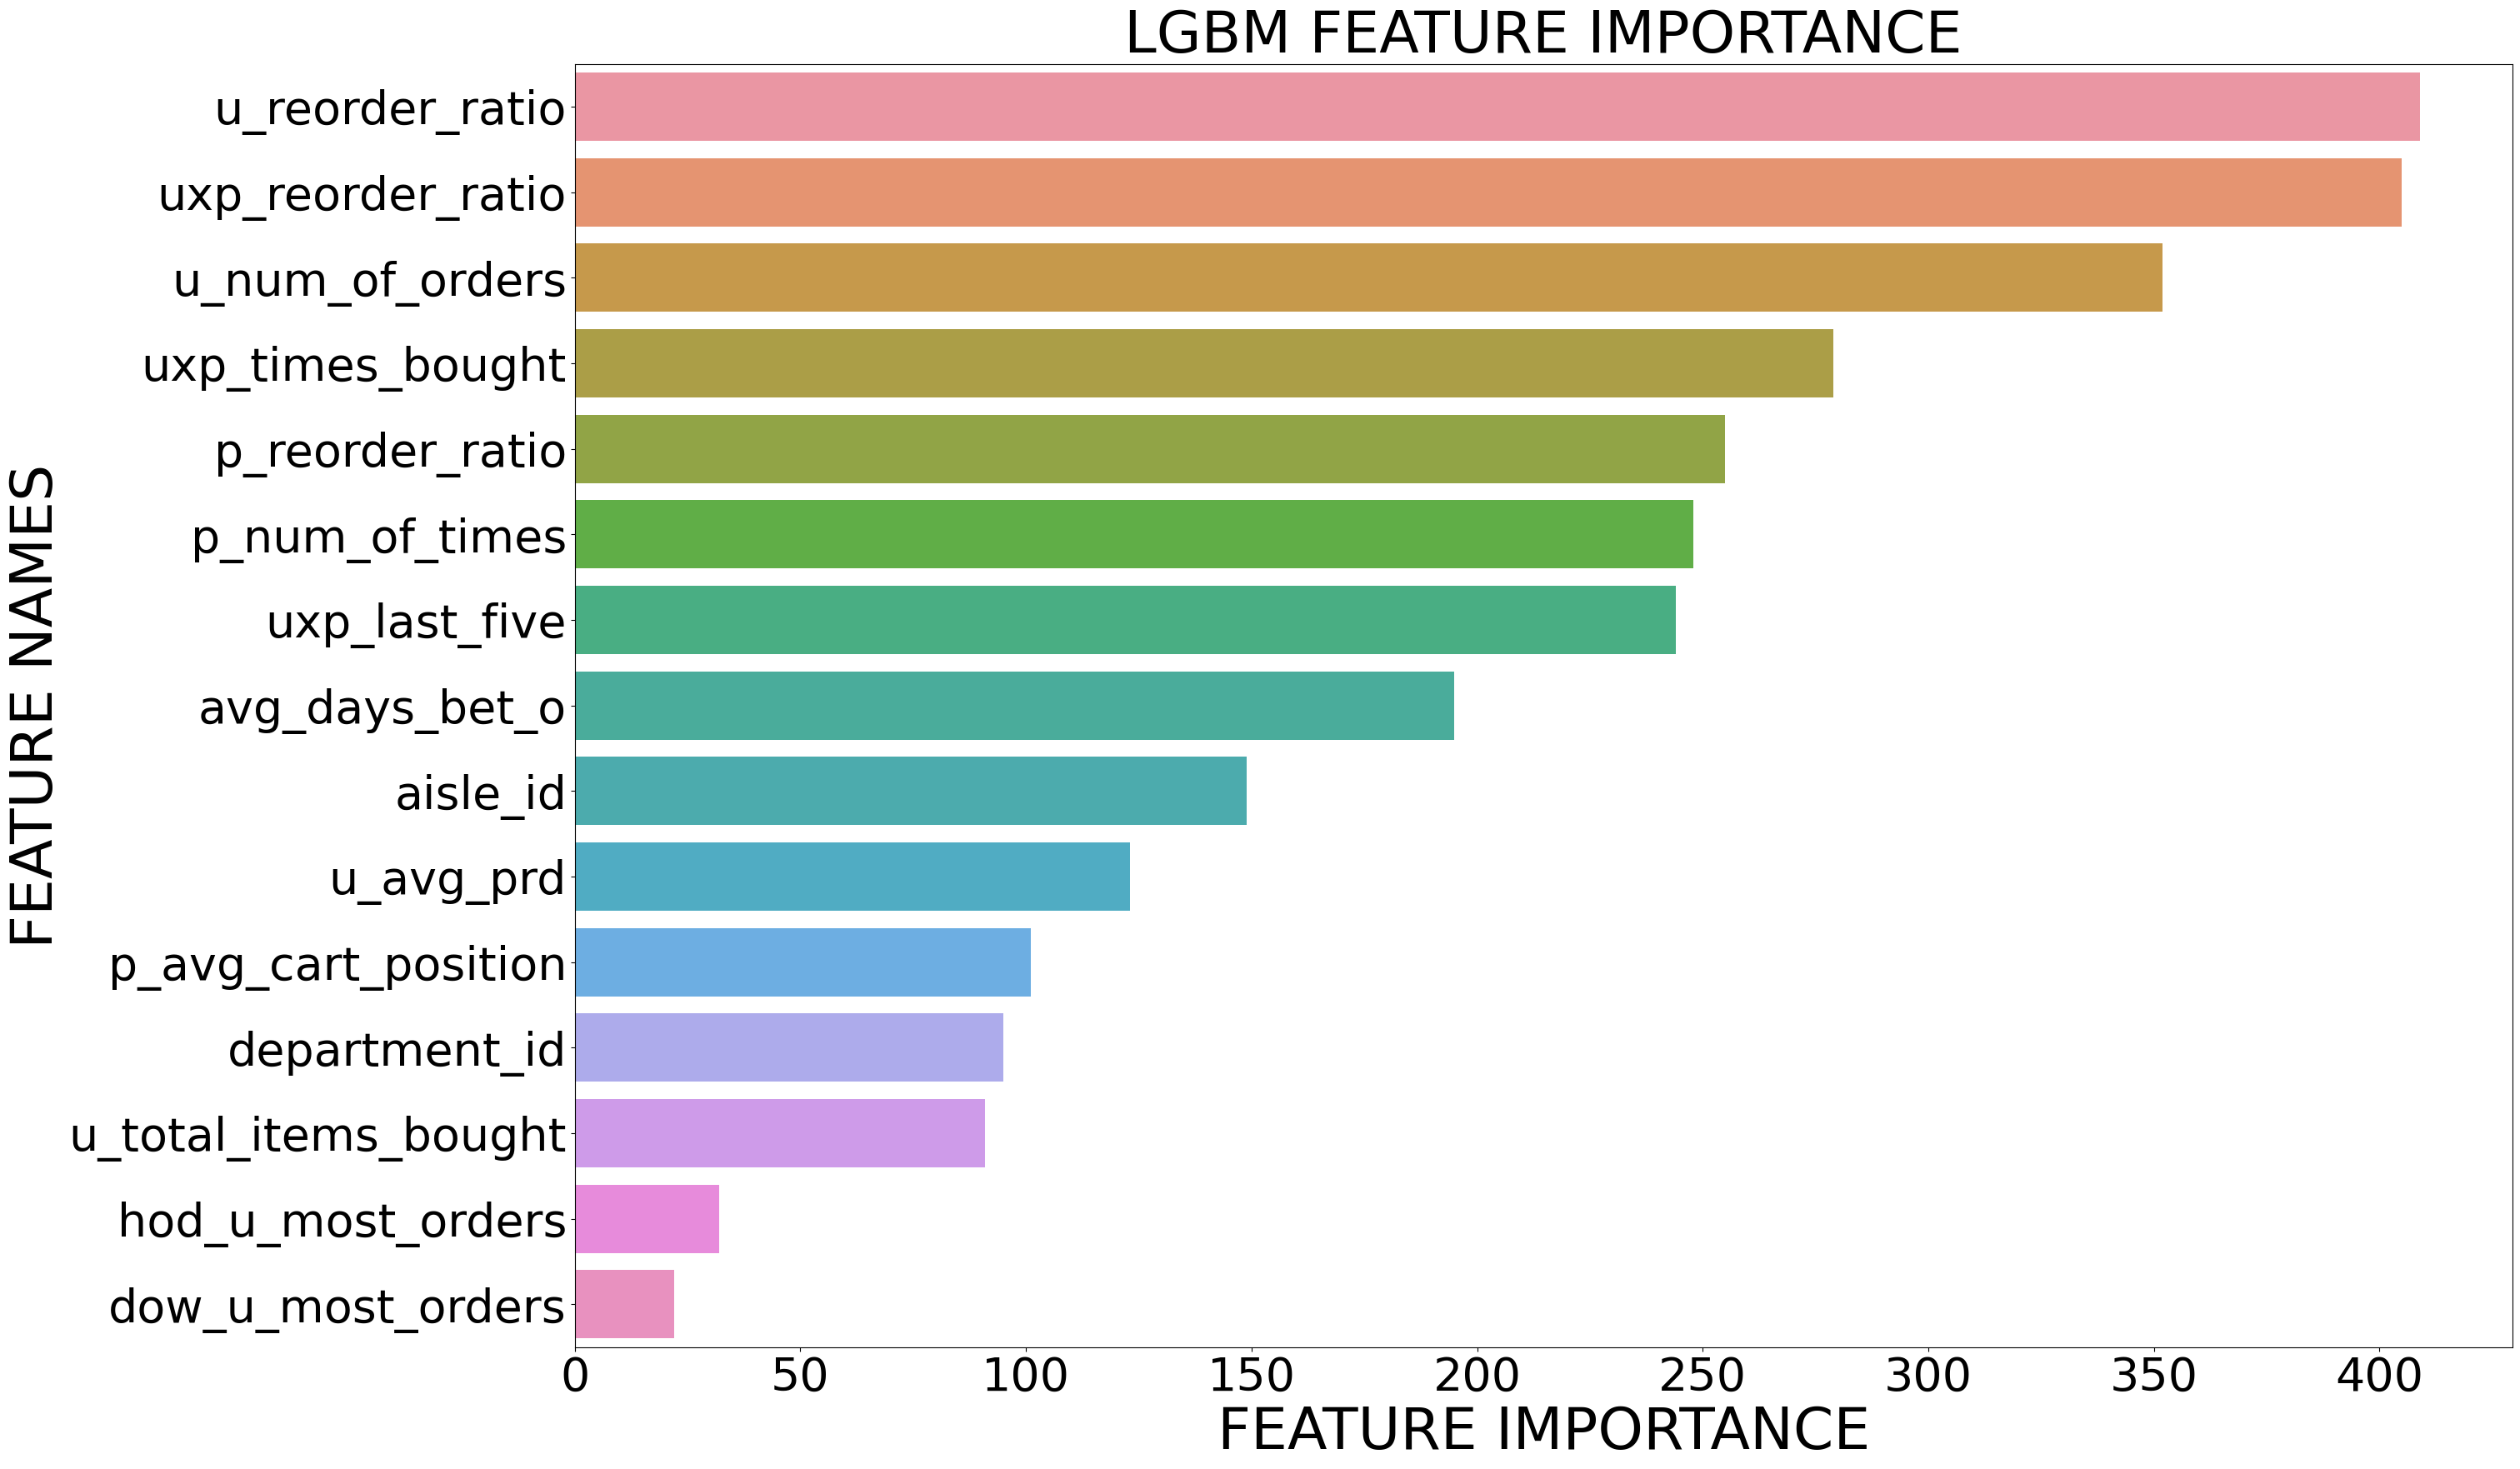

In [21]:
# LGBM với toàn bộ dữ liệu
# Huấn luyện mô hình
model_fi = lgb.LGBMClassifier()
model_fi.fit(X, y)
    

lgbm_scores = model_fi.feature_importances_

lgbm_feats_score = list(zip(X.columns, lgbm_scores))
lgbm_feats_score.sort(key=lambda x: -x[1])

plot_feature_importance(
    [i[1] for i in lgbm_feats_score][:50],
    [i[0] for i in lgbm_feats_score][:50],
    'LGBM'
)